In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
search_types = ['BFS', 'BF-Tree-S',
                'DF-Graph-S', 'D-limited-S',
                'UCS', 'Recursive Best First Search with h1',
                'Greedy Best First Graph Search with h1', 'A* with h1',
                'A* with h_ignore_preconditions',
                'A* with h_pg_levelsum']

In [3]:
colnames = ['problem', 'search_id', 'search_type', 'expansions', 'goal_tests', 'new_nodes', 'plan_length', 'seconds']
result = pd.read_csv('result.txt', names=colnames)
result['search_type'] = result['search_id'].map(lambda x: search_types[x-1])
result

,problem,search_id,search_type,expansions,goal_tests,new_nodes,plan_length,seconds
0,1,1,breadth_first_search,43.0,56.0,180.0,6.0,0.020423
1,1,2,breadth_first_tree_search,1458.0,1459.0,5960.0,6.0,0.639505
2,1,3,depth_first_graph_search,12.0,13.0,48.0,12.0,0.005444
3,1,4,depth_limited_search,101.0,271.0,414.0,50.0,0.059900
4,1,5,uniform_cost_search,55.0,57.0,224.0,6.0,0.025663
5,1,6,recursive_best_first_search with h_1,4229.0,4230.0,17029.0,6.0,2.192055
6,1,7,greedy_best_first_graph_search with h_1,7.0,9.0,28.0,6.0,0.003459
7,1,8,astar_search with h_1,55.0,57.0,224.0,6.0,0.026202
8,1,9,astar_search with h_ignore_preconditions,41.0,43.0,170.0,6.0,0.021445
9,1,10,astar_search with h_pg_levelsum,11.0,13.0,50.0,6.0,0.977602


In [4]:
gb = result.groupby('search_id')
gb_mean = gb.mean()
gb_count = gb.count()['seconds']
gb_mean['count'] = gb_count
gb_mean['name'] = gb_mean.index.map(lambda x: search_types[x-1])
gb_mean

,problem,expansions,goal_tests,new_nodes,plan_length,seconds,count,name
search_id,,,,,,,,
1,2,5836.333333,7447.000000,51880.000000,9.000000,25.123625,3,breadth_first_search
2,2,1458.000000,1459.000000,5960.000000,6.000000,0.639505,1,breadth_first_tree_search
3,2,604.333333,605.333333,5224.333333,585.666667,2.561685,3,depth_first_graph_search
4,2,106796.000000,983682.000000,983942.500000,50.000000,293.281184,2,depth_limited_search
5,2,7710.333333,7712.333333,67961.000000,9.000000,93.387230,3,uniform_cost_search
6,2,4229.000000,4230.000000,17029.000000,6.000000,2.192055,1,recursive_best_first_search with h_1
7,2,2194.333333,2196.333333,19386.666667,16.333333,23.036474,3,greedy_best_first_graph_search with h_1
8,2,7710.333333,7712.333333,67961.000000,9.000000,93.150981,3,astar_search with h_1
9,2,2221.666667,2223.666667,19880.000000,9.000000,20.921015,3,astar_search with h_ignore_preconditions


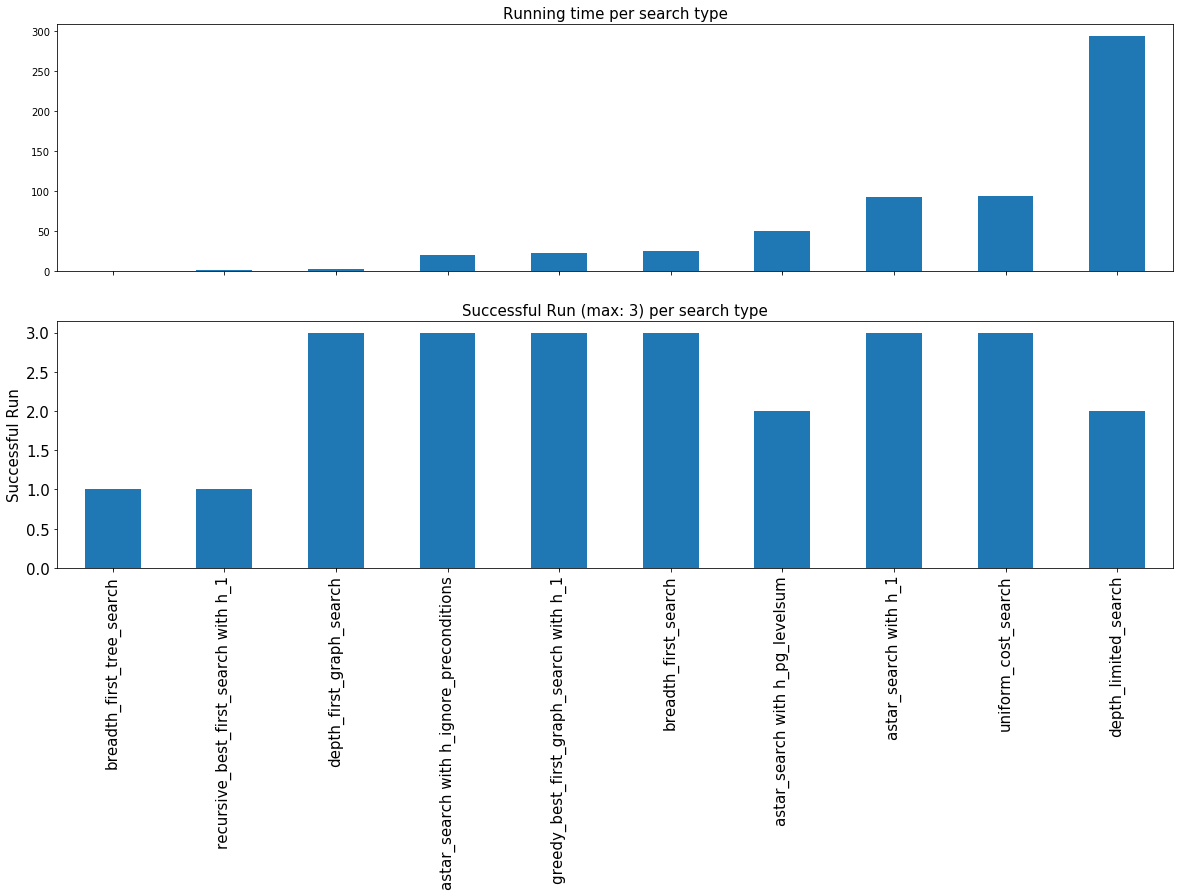

In [75]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(211)
gb_mean.sort_values(by='seconds').plot(x='name', y='seconds', kind='bar', legend=False, ax=ax1)
plt.title('Running time per search type', fontsize=15)

ax2 = plt.subplot(212, sharex=ax1)
gb_mean.sort_values(by='seconds').plot(x='name', y='count', kind='bar', legend=False, ax=ax2, fontsize=15)
plt.title('Successful Run (max: 3) per search type', fontsize=15)
plt.xlabel('')
plt.ylabel("Successful Run", fontsize=15)
plt.show()